## Constants Define

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
dataset_outdim = {'cifar10':10, 'cifar100':100,'imagenet':1000}
data_real_name = {'cifar10':'CIFAR10', 'cifar100':'CIFAR100','imagenet':'ImageNet-1K'}
model_real_name = {'resnet':'ResNet101', 'vit':'ViT-B/16'}
flops_dict = dict()
acc_dict = dict()

resnet_cifar10_acc = [64.47, 72.24, 81.45, 84.25, 86.01, 90.24, 92.6, 94.31, 95.77, 95.08, 97.52]
resnet_cifar100_acc = [37.8, 44.83, 60.08, 67.39, 72.1, 74.34, 77.32, 79.9, 80.94, 83.05, 86.24]
resnet_imagenet_acc = [28.278, 35.742, 51.206, 54.662, 60.53, 63.732, 67.158, 70.394, 73.672, 79.374, 80.888]
vit_cifar10_acc = [72.76, 80.35, 85.8, 89.42, 91.98, 93.12, 94.94, 96.44, 96.95, 97.35, 97.63]
vit_cifar100_acc = [48.21, 59.63, 67.93, 73.31, 77.9, 80.8, 83.71, 85.33, 86.61, 87.04, 87.75]
vit_imagenet_acc = [34.76, 42.65, 51.82, 57.76, 62.19, 65.5, 69.29, 72.3, 75.3, 77.6, 81.06]

resnet_cifar10_flops = [1412860928, 2076990464, 2890800128, 3550413824, 4210027520, 4869641216, 5529254912, 6188868608, 6848482304, 7661519360, 7880637952]
resnet_cifar100_flops = [1412907008, 2077036544, 2890892288, 3550505984, 4210119680, 4869733376, 5529347072, 6188960768, 6848574464, 7661703680, 7880822272]
resnet_imagenet_flops = [1413367808, 2077497344, 2891813888, 3551427584, 4211041280, 4870654976, 5530268672, 6189882368, 6849496064, 7663546880, 7882665472]
vit_cifar10_flops = [2908083456, 4303940352, 5699797248, 7095654144, 8491511040, 9887367936, 11283224832, 12679081728, 14074938624, 15470795520, 16866652416]
vit_cifar100_flops = [2908152576, 4304009472, 5699866368, 7095723264, 8491580160, 9887437056, 11283293952, 12679150848, 14075007744, 15470864640, 16866721536]
vit_imagenet_flops= [2908843776, 4304700672, 5700557568, 7096414464, 8492271360, 9888128256, 11283985152, 12679842048, 14075698944, 15471555840, 16867412736]

########### Data -> dict
flops_dict['resnet_cifar10'] = resnet_cifar10_flops;flops_dict['resnet_cifar100'] = resnet_cifar100_flops;flops_dict['resnet_imagenet'] = resnet_imagenet_flops
flops_dict['vit_cifar10'] = vit_cifar10_flops;flops_dict['vit_cifar100'] = vit_cifar100_flops;flops_dict['vit_imagenet'] = vit_imagenet_flops
acc_dict['resnet_cifar10'] = resnet_cifar10_acc;acc_dict['resnet_cifar100'] = resnet_cifar100_acc;acc_dict['resnet_imagenet'] = resnet_imagenet_acc
acc_dict['vit_cifar10'] = vit_cifar10_acc;acc_dict['vit_cifar100'] = vit_cifar100_acc;acc_dict['vit_imagenet'] = vit_imagenet_acc

## ResNet CIFAR-10

In [2]:
data_choice = 'cifar10'
model_choice = 'resnet'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


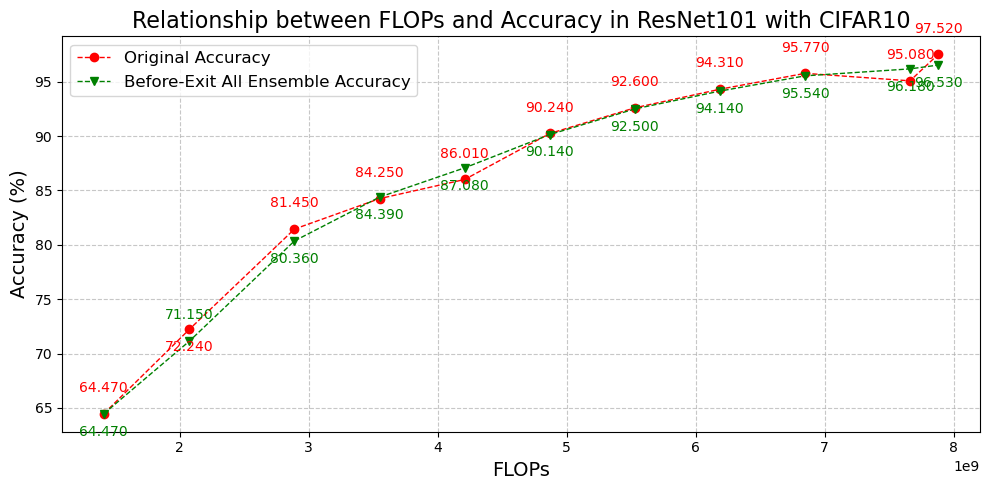

In [3]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

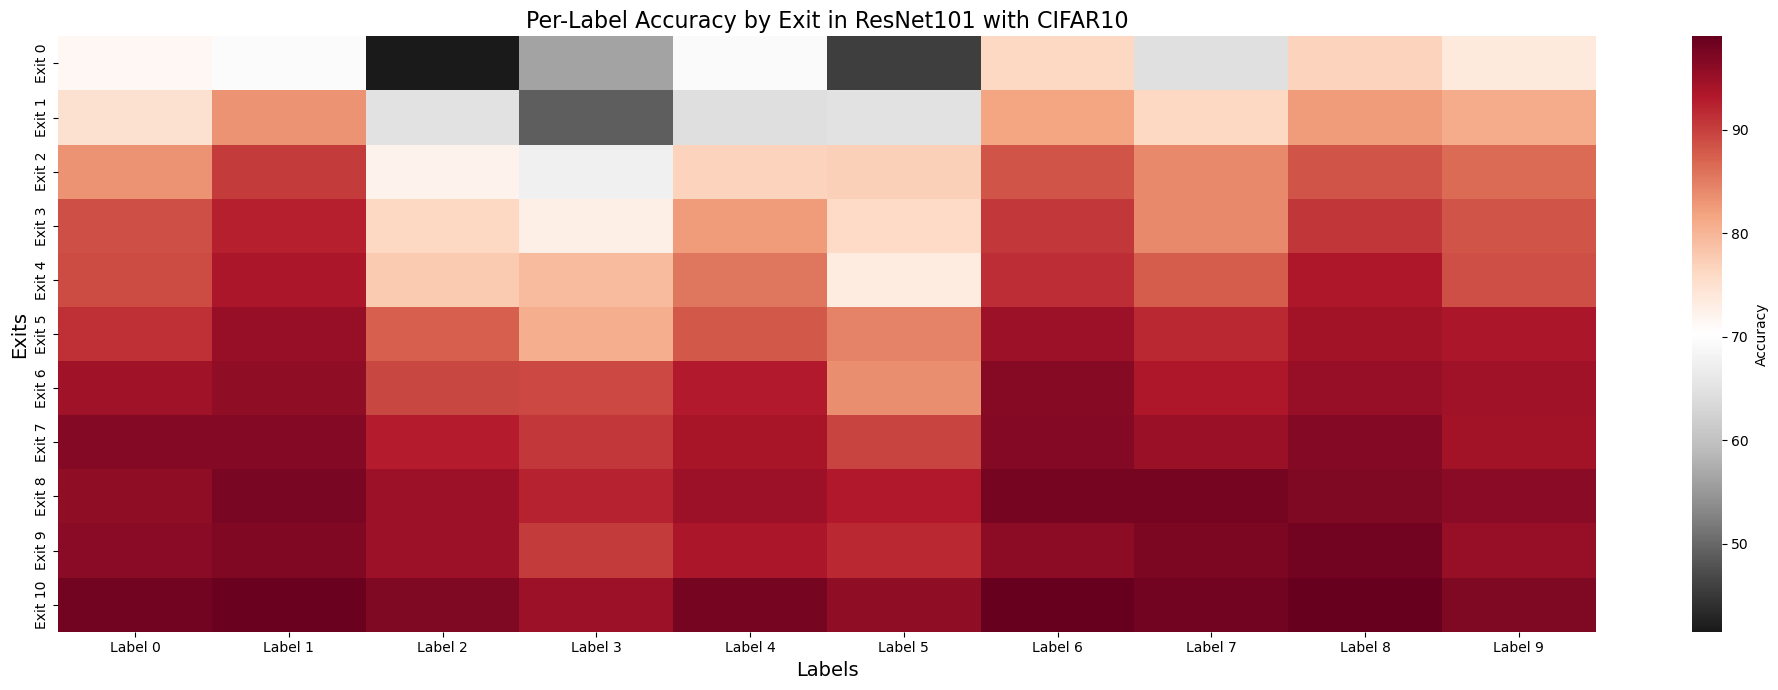

In [4]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

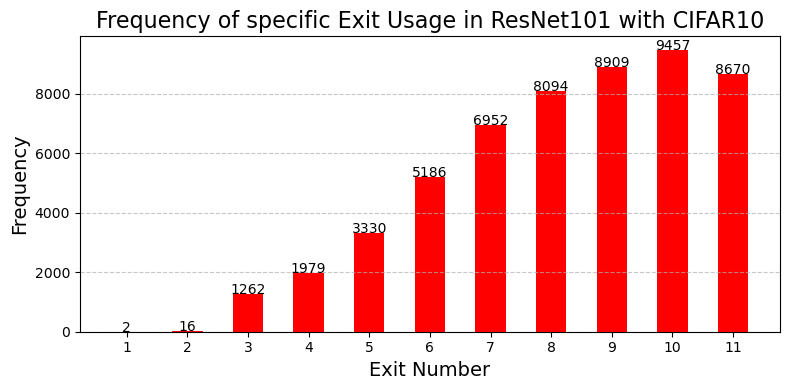

In [5]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

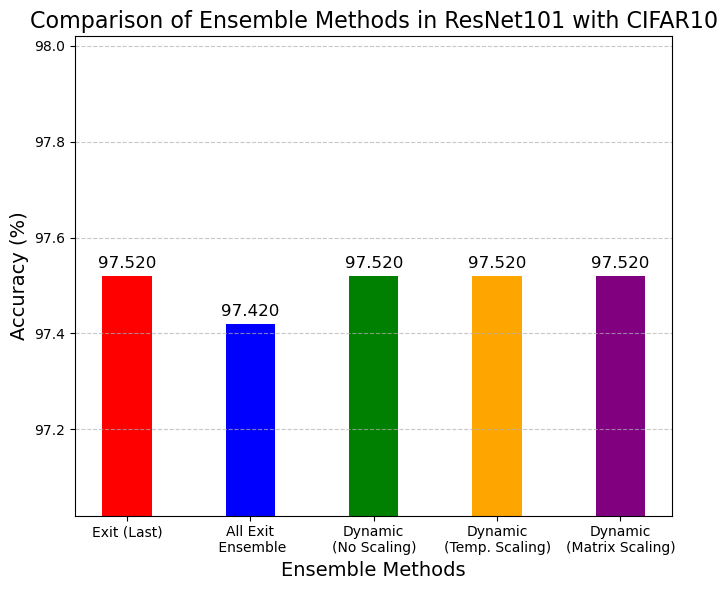

In [6]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ResNet CIFAR-100

In [7]:
data_choice = 'cifar100'
model_choice = 'resnet'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


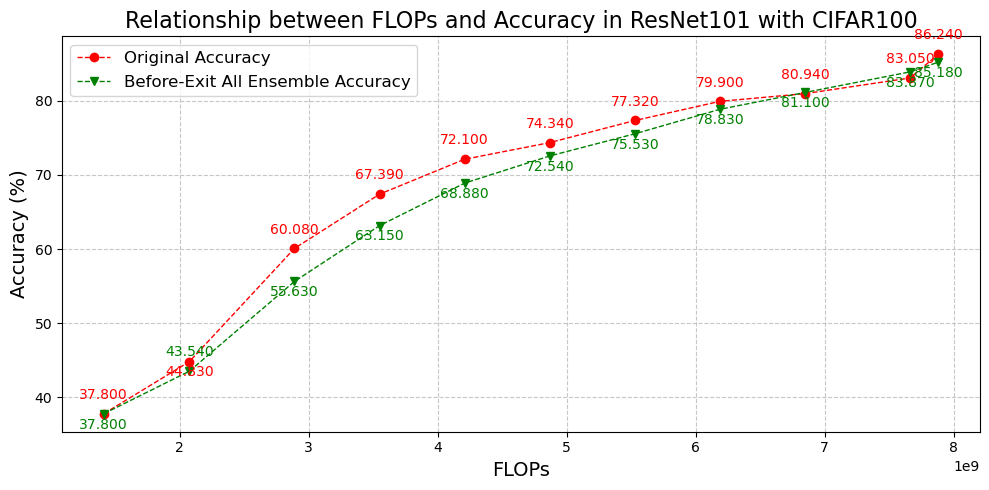

In [8]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

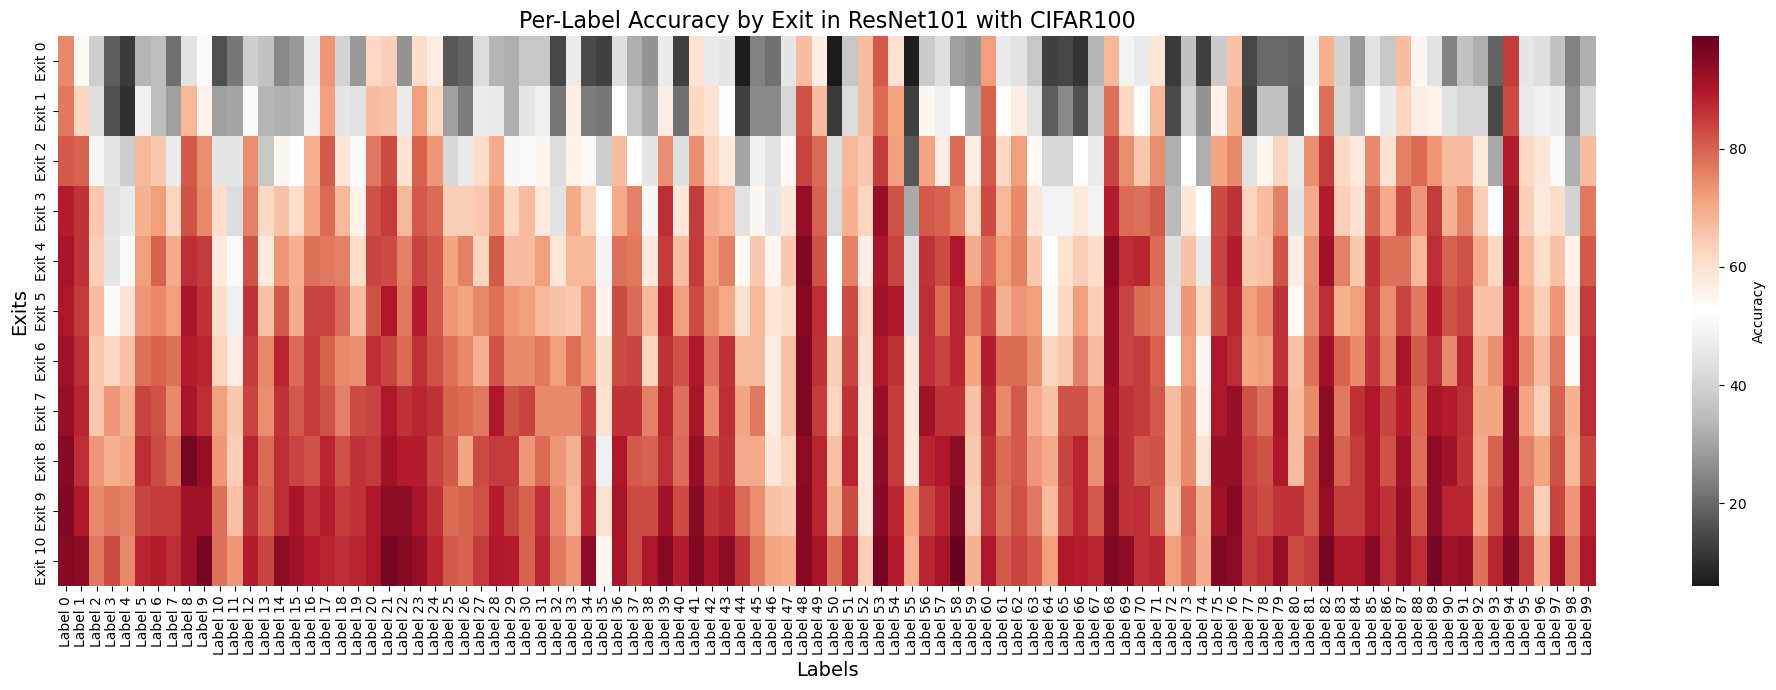

In [9]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

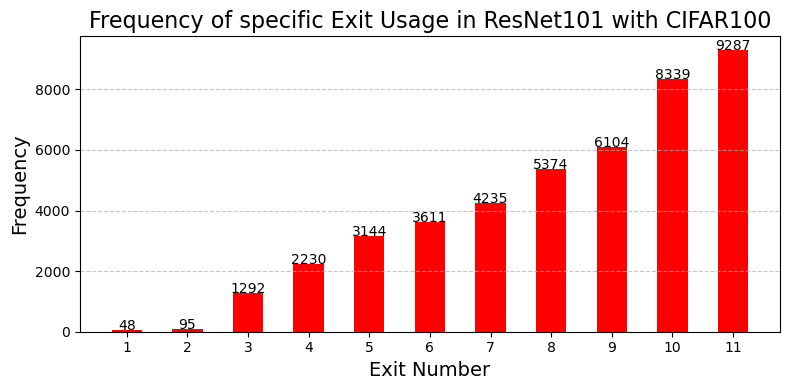

In [10]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

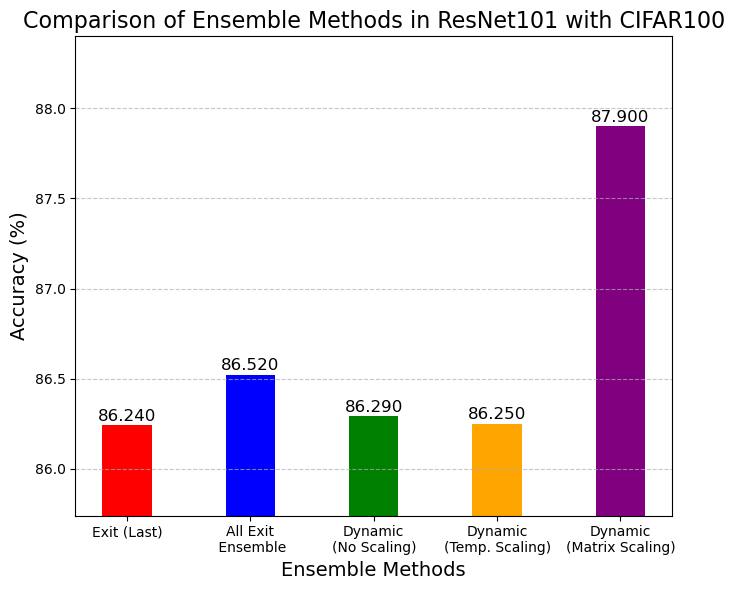

In [11]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ResNet ImageNet-1K

In [12]:
data_choice = 'imagenet'
model_choice = 'resnet'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


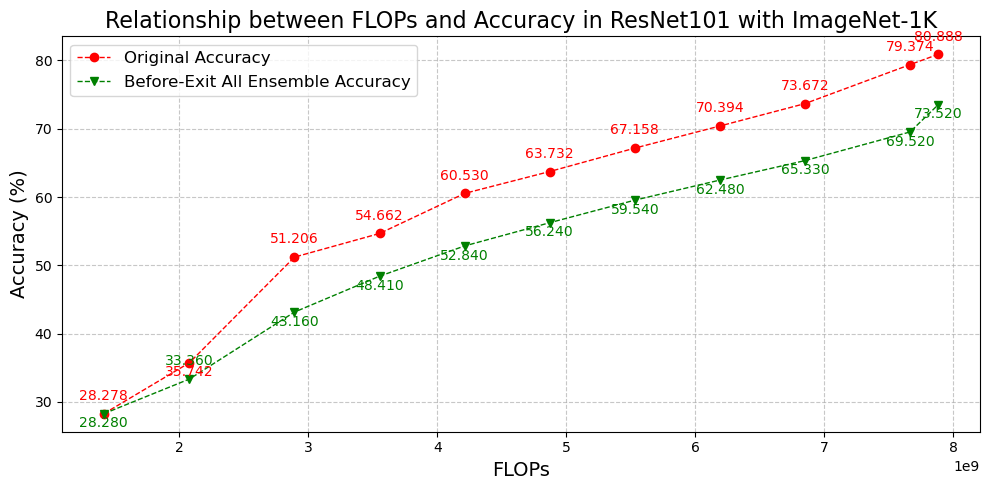

In [13]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

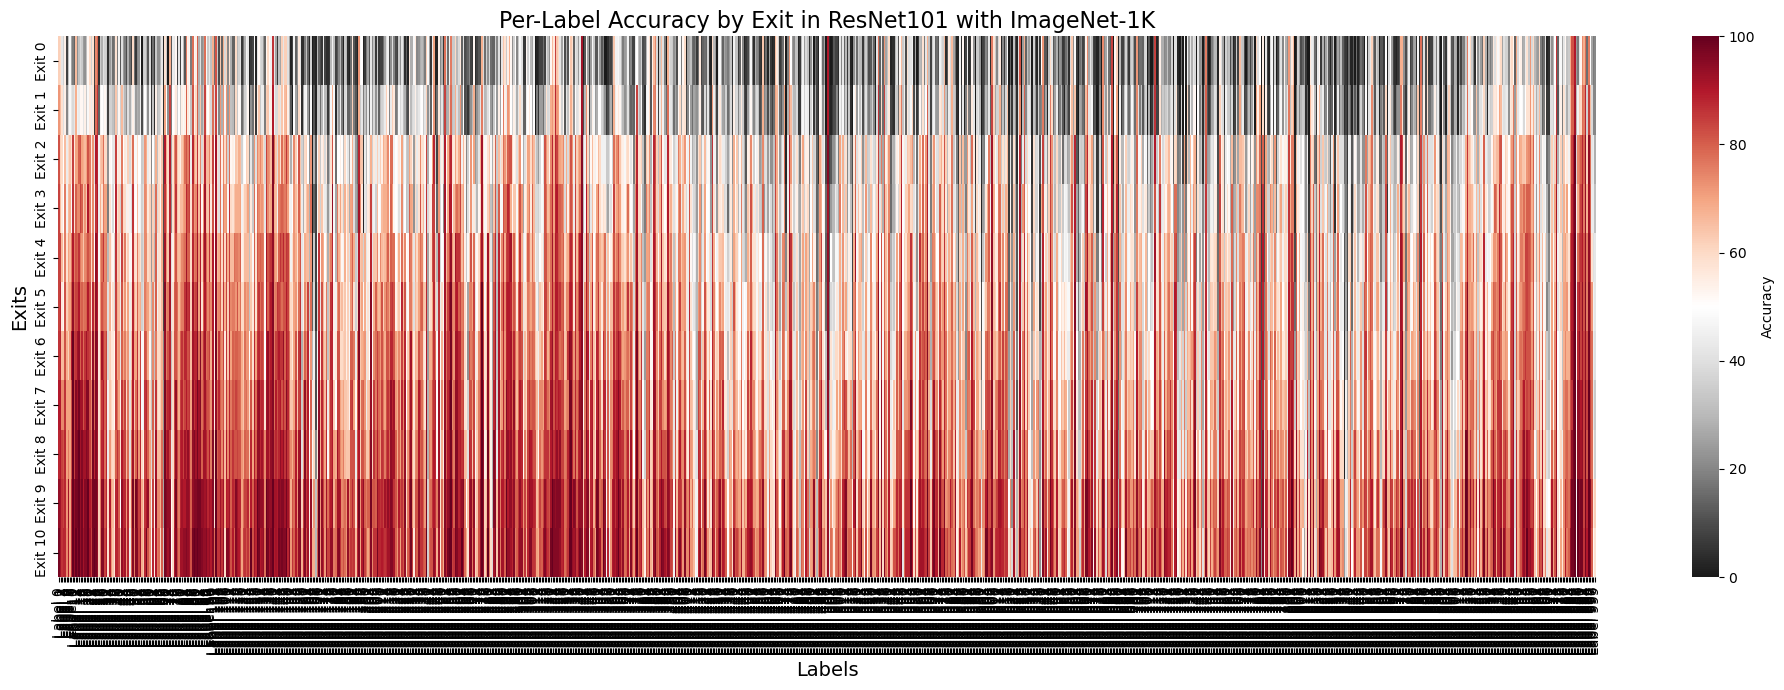

In [14]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

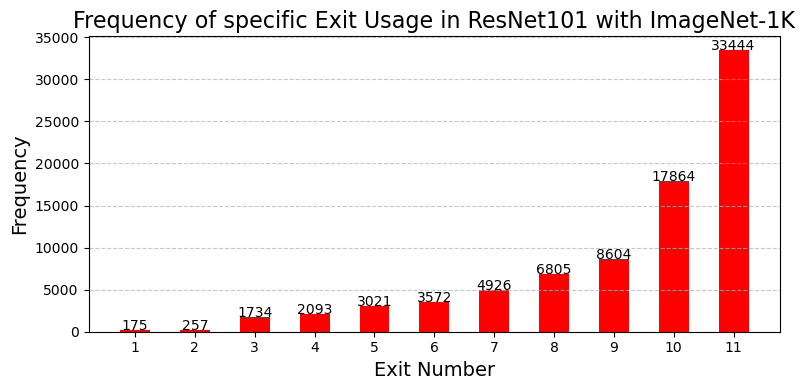

In [15]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

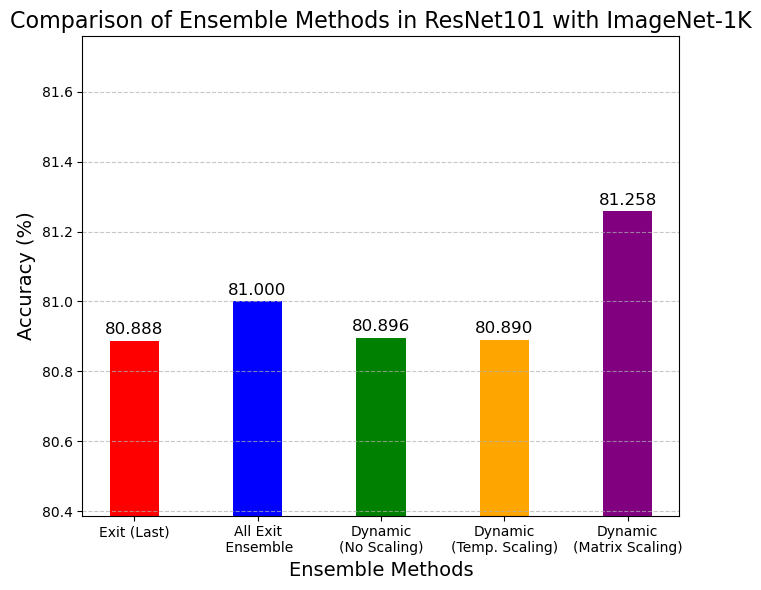

In [16]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ViT CIFAR-10

In [17]:
data_choice = 'cifar10'
model_choice = 'vit'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


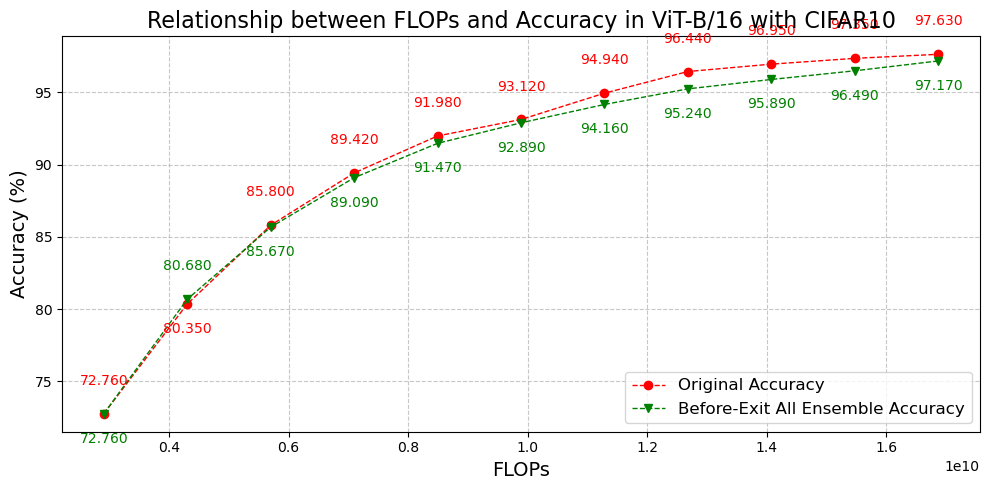

In [18]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

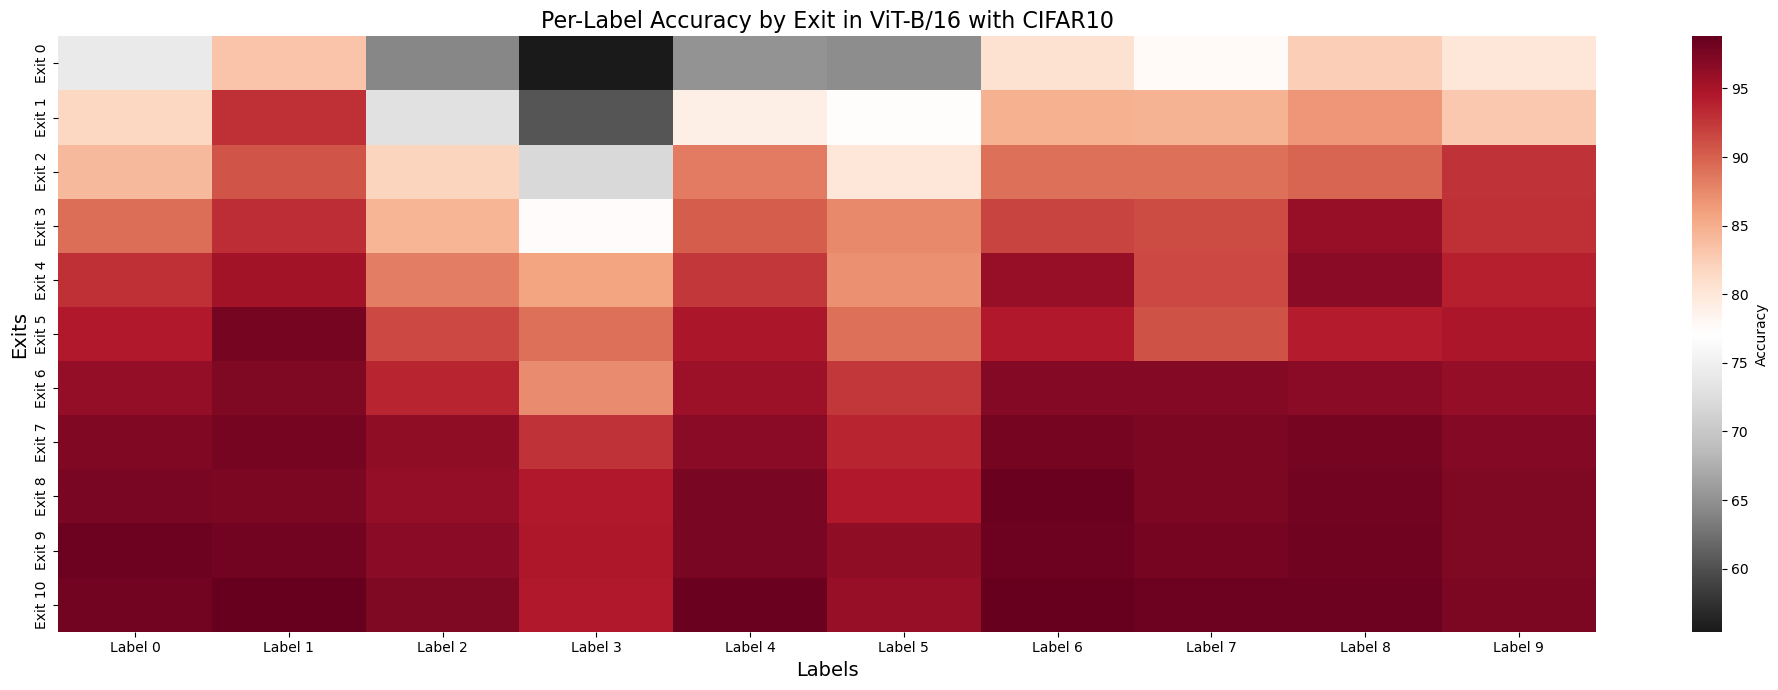

In [19]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

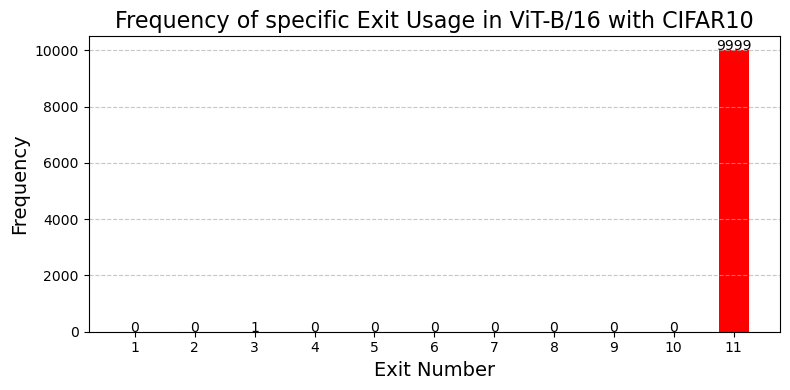

In [20]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

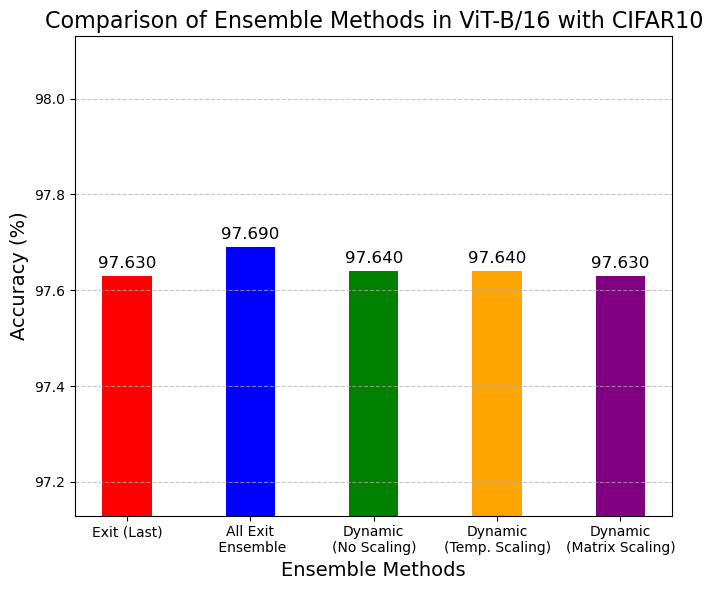

In [21]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ViT CIFAR-100

In [22]:
data_choice = 'cifar100'
model_choice = 'vit'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


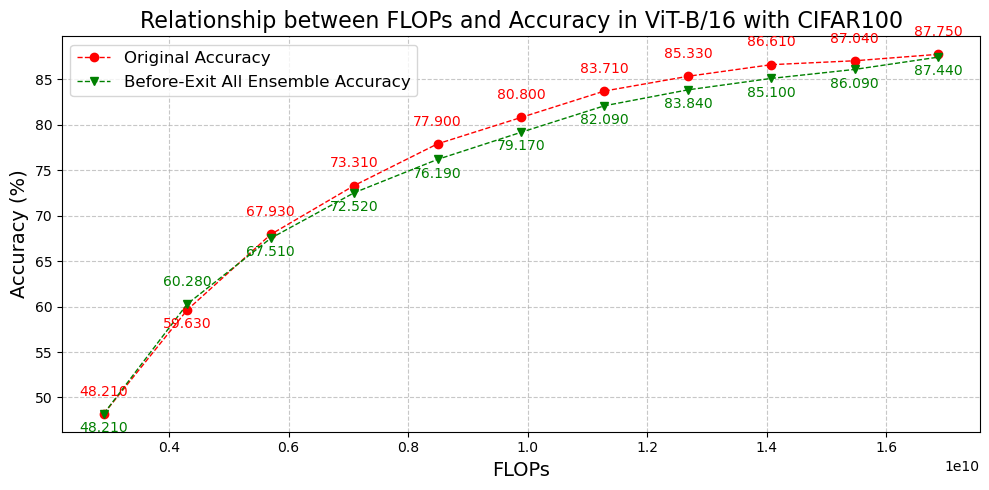

In [23]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

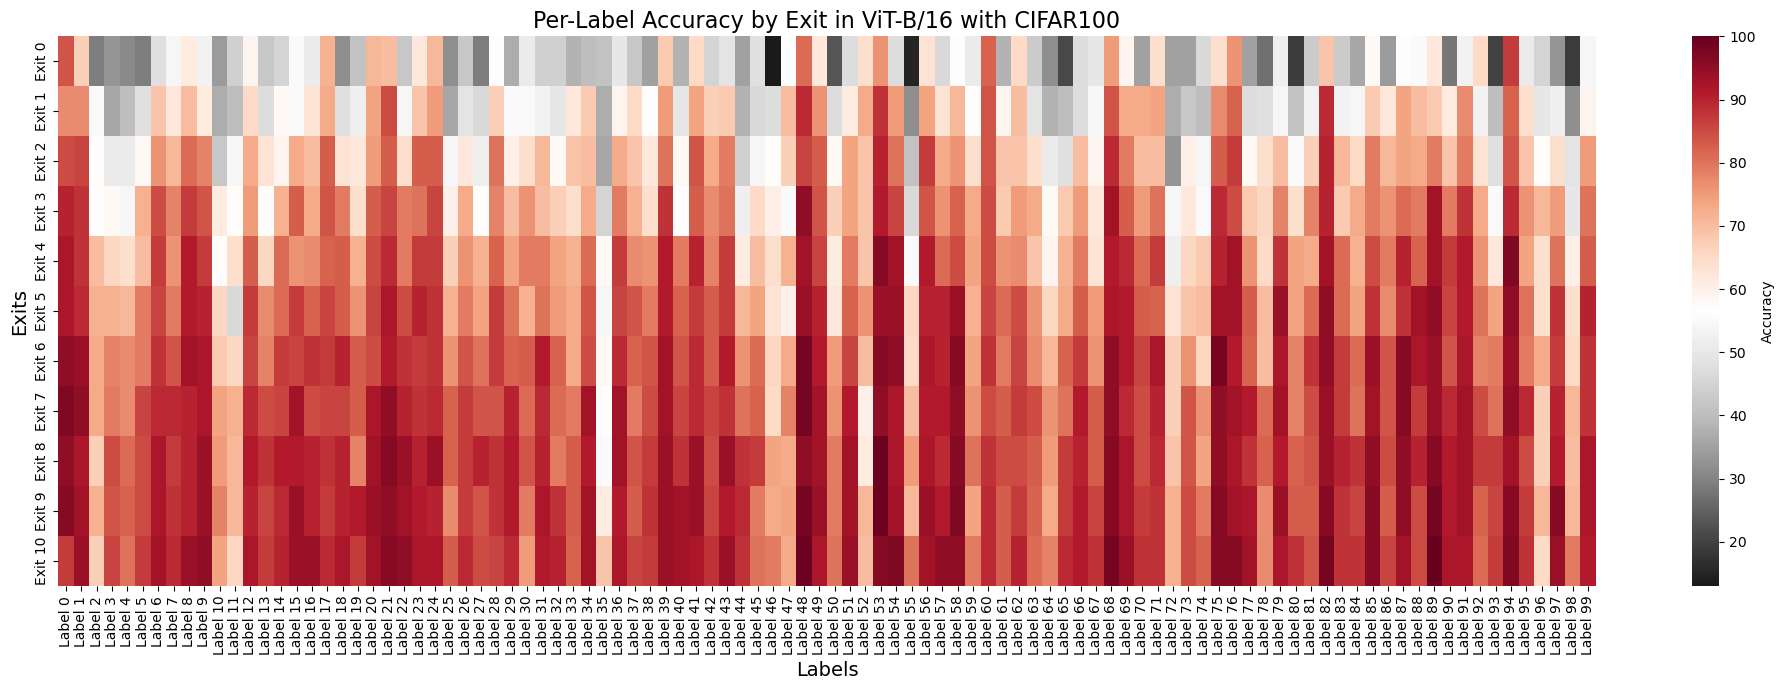

In [24]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

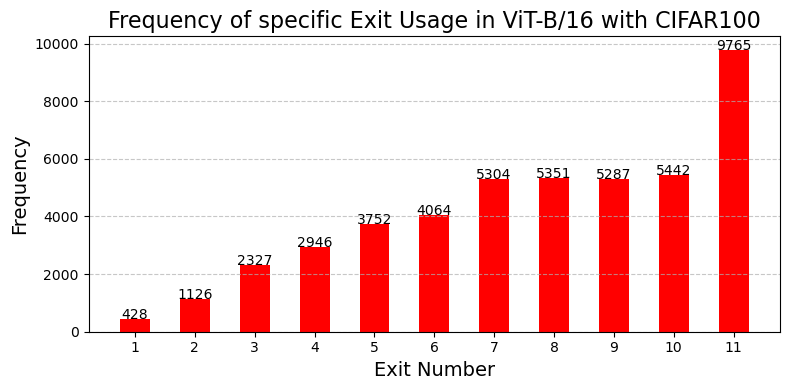

In [25]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

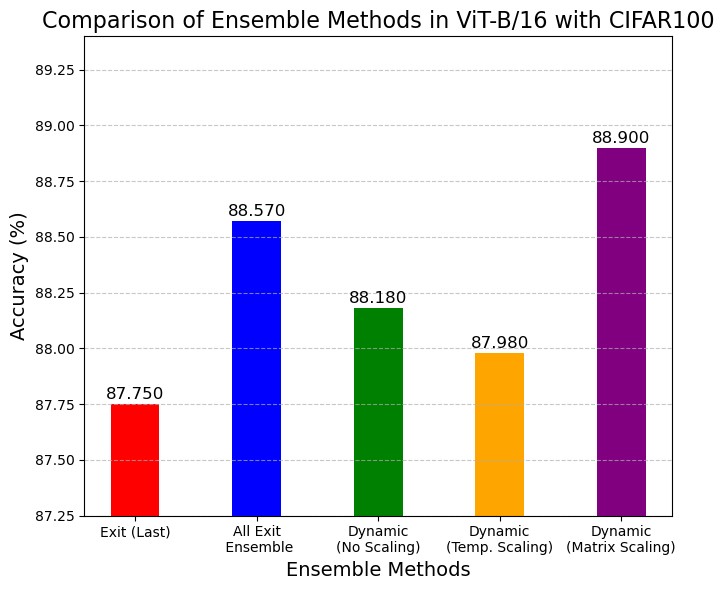

In [26]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ViT imagenet

In [27]:
data_choice = 'imagenet'
model_choice = 'vit'

/tmp/ipykernel_82357/827950234.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache_exp = torch.load(cache_path)


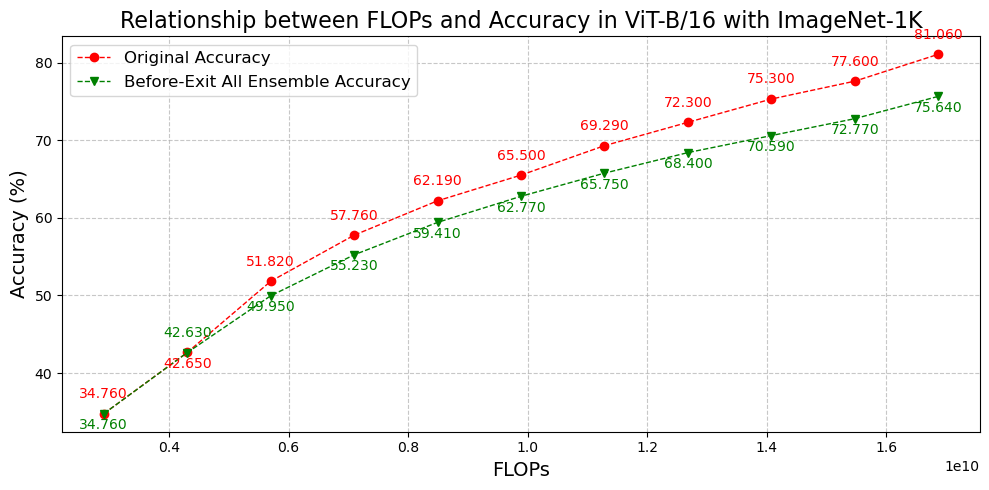

In [28]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Before-Exit All Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.3f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

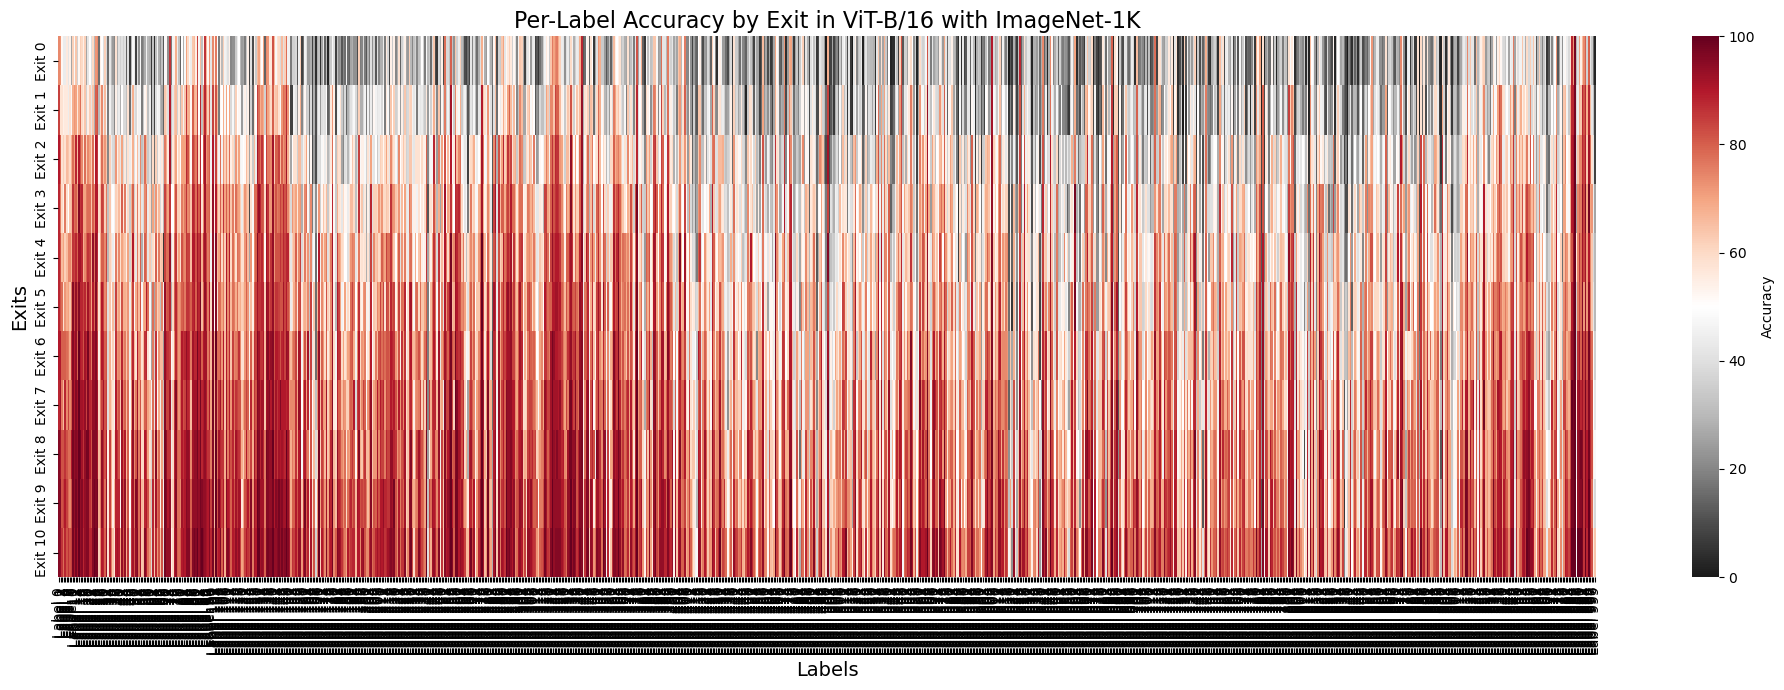

In [29]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

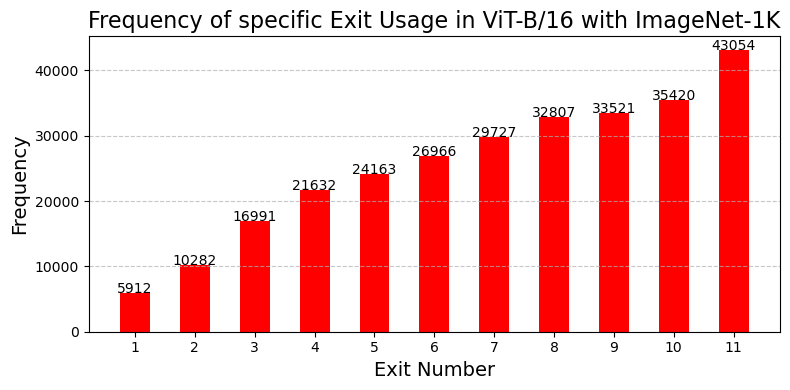

In [30]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

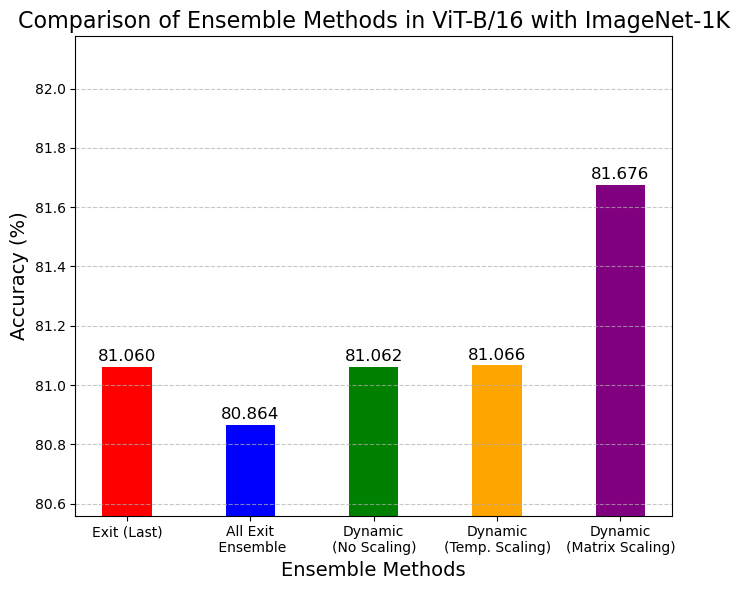

In [31]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Best Static\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} with {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()